In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [2]:
# laod the data
initialData = pd.read_csv("Global YouTube Statistics.csv")
# display first five rows
initialData.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
# display description of the initial data
initialData.describe(include='all')

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,995,9.950000e+02,9.950000e+02,949,995,995.000000,873,873,965,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
unique,NaN,995,NaN,NaN,18,992,NaN,49,49,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,T-Series,NaN,NaN,Entertainment,Preston,NaN,United States,US,Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,241,2,NaN,313,313,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,498.00000,NaN,2.298241e+07,1.103954e+10,NaN,NaN,9187.125628,NaN,NaN,NaN,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,NaN,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,NaN,1.752611e+07,1.411084e+10,NaN,NaN,34151.352254,NaN,NaN,NaN,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,NaN,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,NaN,1.230000e+07,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,NaN,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,NaN,1.450000e+07,4.288145e+09,NaN,NaN,194.500000,NaN,NaN,NaN,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,NaN,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,NaN,1.770000e+07,7.760820e+09,NaN,NaN,729.000000,NaN,NaN,NaN,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,NaN,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,NaN,2.460000e+07,1.355470e+10,NaN,NaN,2667.500000,NaN,NaN,NaN,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,NaN,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880


In [4]:
# drop the variable that I am not interested in
interested_Data = initialData.copy()
interested_Data = interested_Data.drop(['Title', 'Abbreviation', 'country_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 
                   'highest_monthly_earnings', 'lowest_yearly_earnings', 'subscribers_for_last_30_days', 
                                        'Gross tertiary education enrollment (%)', 'Latitude', 'Longitude',
                                        'Unemployment rate', 'Urban_population'], axis=1)
interested_Data

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,highest_yearly_earnings,created_year,created_month,created_date,Population
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,1.084000e+08,2006.0,Mar,13.0,1.366418e+09
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,4055159.0,7423.0,5.800000e-01,2006.0,Mar,5.0,3.282395e+08
2,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,1.0,6.470000e+07,2012.0,Feb,20.0,3.282395e+08
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,1.0,9.480000e+07,2006.0,Sep,1.0,3.282395e+08
4,5,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,2.0,8.750000e+07,2006.0,Sep,20.0,1.366418e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,Brazil,Entertainment,525.0,172.0,2.650000e+07,2017.0,Feb,12.0,2.125594e+08
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,Games,6141.0,69.0,3.100000e+06,2018.0,Sep,14.0,1.366418e+09
992,993,Panda,12300000,2.214684e+09,NaN,2452,United Kingdom,Games,129005.0,1202.0,3.200000e+03,2006.0,Sep,11.0,6.683440e+07
993,994,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,Games,35112.0,69.0,1.858000e+05,2012.0,May,9.0,1.028545e+07


### dealing with missing values

In [5]:
# check how many nan values
interested_Data.isnull().sum()

rank                         0
Youtuber                     0
subscribers                  0
video views                  0
category                    46
uploads                      0
Country                    122
channel_type                30
video_views_rank             1
channel_type_rank           33
highest_yearly_earnings      0
created_year                 5
created_month                5
created_date                 5
Population                 123
dtype: int64

In [6]:
# drop all the rows with a nan value
interested_Data = interested_Data.dropna(axis=0)
interested_Data.isnull().sum()

rank                       0
Youtuber                   0
subscribers                0
video views                0
category                   0
uploads                    0
Country                    0
channel_type               0
video_views_rank           0
channel_type_rank          0
highest_yearly_earnings    0
created_year               0
created_month              0
created_date               0
Population                 0
dtype: int64

## YouTube Analytics: Gain valuable insights into the success factors of top YouTube channels and understand what sets them apart from the rest.

### Sort the success factors that lead to a top channel and create visualizations

### The top 10 in subscribers

In [7]:
# slice the interested_Data to only get the first ten youtube creators
# the data is already sorted based on subscribers
# x is a dummy to display only subscribers and youtube creators
top10_subscribers = interested_Data.iloc[:10, :]
top10_subscribers

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,highest_yearly_earnings,created_year,created_month,created_date,Population
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,1.084000e+08,2006.0,Mar,13.0,1.366418e+09
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,4055159.0,7423.0,5.800000e-01,2006.0,Mar,5.0,3.282395e+08
2,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,1.0,6.470000e+07,2012.0,Feb,20.0,3.282395e+08
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,1.0,9.480000e+07,2006.0,Sep,1.0,3.282395e+08
4,5,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,2.0,8.750000e+07,2006.0,Sep,20.0,1.366418e+09
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,1111,United States,Entertainment,5.0,3.0,3.510000e+07,2015.0,May,12.0,3.282395e+08
7,8,PewDiePie,111000000,2.905804e+10,Gaming,4716,Japan,Entertainment,44.0,4.0,1.900000e+06,2010.0,Apr,29.0,1.262266e+08
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,493,Russia,People,630.0,25.0,2.300000e+06,2016.0,Jan,14.0,1.443735e+08
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,574,United States,Entertainment,8.0,6.0,2.790000e+07,2018.0,Apr,23.0,3.282395e+08
10,11,Zee Music Company,96700000,5.785629e+10,Music,8548,India,Music,12.0,2.0,3.860000e+07,2014.0,Mar,12.0,1.366418e+09


In [8]:
# x1 is to display simpflied information for only subscribers
x1 = top10_subscribers.iloc[:, 1:3]
x1

,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000
10,Zee Music Company,96700000


In [9]:
# x(x-axis) and y(y-axis) are the values in two different lits
# graphName: the name of the bar chart
# colors: the color of the bars

def create_barChart(x, y, graphName, colors):
    # set the figure size with height 15 and width 5
    fig = plt.figure(figsize=(15, 5))  
    
    # call bar method and pass array x and y into the function and specify the color
    plt.bar(x, y, color=colors) 
    
    # make a rotation for x-axis
    plt.xticks(rotation=45) 
    # set x label
    plt.xlabel(x.name, fontsize=20) 
    # set y label
    plt.ylabel(y.name, fontsize=20) 
    # set the title
    plt.title(graphName, fontsize=20) 
    # show bar chart
    plt.show()

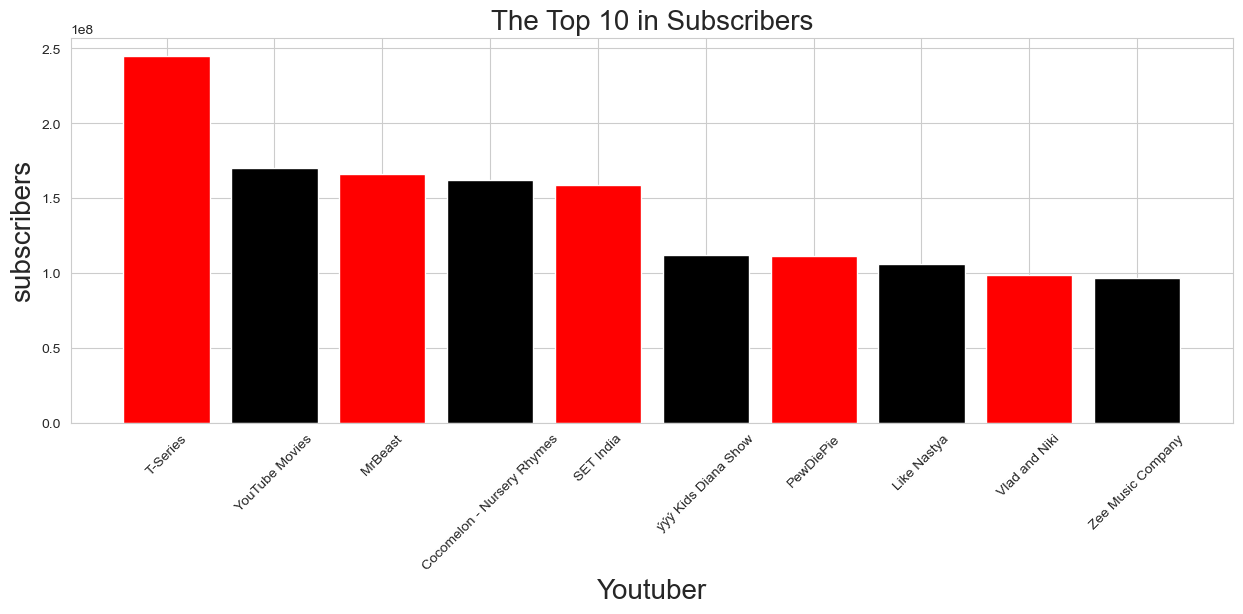

In [10]:
# call create_barChart function to create the bar chart of the subscribers
create_barChart(x1['Youtuber'], x1['subscribers'], 'The Top 10 in Subscribers', ['red', 'black'])

#### The first place is T-Series, the second place is YouTube Movies, and the third place is MrBeast on the top 10 list of subscribers.

### The top 10 in video-views_rank

In [11]:
# The function is to sort the data frame based on a column
# df: the data frame you want to sort
# colName: the name of the column that you want to sort
# if_ascen: pass false means sort by descending otherwise True
def sort_specific_col(df, colName, if_ascen):
    # create a new data frame and assgin the sorted data frame to it
    new_df = df.sort_values(colName, ascending=if_ascen)
    
    # slice the first ten columns to select the top 10 and reset the index 
    new_df = new_df.iloc[:10, :].reset_index(drop=True)
    return new_df

In [12]:
# call the sort_specific_col to get the top10_videoviews_rank
top10_videoviews_rank = sort_specific_col(interested_Data, 'video_views_rank', True)
top10_videoviews_rank

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,highest_yearly_earnings,created_year,created_month,created_date,Population
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,108400000.0,2006.0,Mar,13.0,1.366418e+09
1,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,1.0,94800000.0,2006.0,Sep,1.0,3.282395e+08
2,5,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,2.0,87500000.0,2006.0,Sep,20.0,1.366418e+09
3,16,Sony SAB,83000000,1.010000e+11,Shows,71270,India,Entertainment,4.0,7.0,79600000.0,2007.0,Aug,4.0,1.366418e+09
4,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,1111,United States,Entertainment,5.0,3.0,35100000.0,2015.0,May,12.0,3.282395e+08
5,12,WWE,96000000,7.742847e+10,Sports,70127,United States,Sports,7.0,1.0,34300000.0,2007.0,May,11.0,3.282395e+08
6,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,574,United States,Entertainment,8.0,6.0,27900000.0,2018.0,Apr,23.0,3.282395e+08
7,22,Zee TV,70500000,7.313905e+10,Entertainment,129204,India,Entertainment,9.0,8.0,81900000.0,2005.0,Dec,11.0,1.366418e+09
8,27,Colors TV,64600000,6.151091e+10,Shows,112915,India,Entertainment,10.0,9.0,57000000.0,2008.0,Jun,13.0,1.366418e+09
9,30,Movieclips,59500000,5.931647e+10,Film & Animation,39113,United States,Film,11.0,3.0,5500000.0,2006.0,Apr,28.0,3.282395e+08


In [13]:
# This function is to create a new data frame with specific infomation you want, so we can see main information easily
# df: is the data frame 
# colNames: is a str array which has the infomation that you want to put into 
def simpflied_df(df, colNames):
    # a new data frame
    x = pd.DataFrame()  
    
    # create a for loop to iterate the names
    for i in colNames:   
        
        # insert the data into the new data frame
        x[colNames] = df[colNames]  
        
    return x

# x2 is to display simpflied information about video views
x2 = simpflied_df(top10_videoviews_rank, ['Youtuber', 'video views'])
x2

,Youtuber,video views
0,T-Series,2.280000e+11
1,Cocomelon - Nursery Rhymes,1.640000e+11
2,SET India,1.480000e+11
3,Sony SAB,1.010000e+11
4,ýýý Kids Diana Show,9.324704e+10
5,WWE,7.742847e+10
6,Vlad and Niki,7.718017e+10
7,Zee TV,7.313905e+10
8,Colors TV,6.151091e+10
9,Movieclips,5.931647e+10


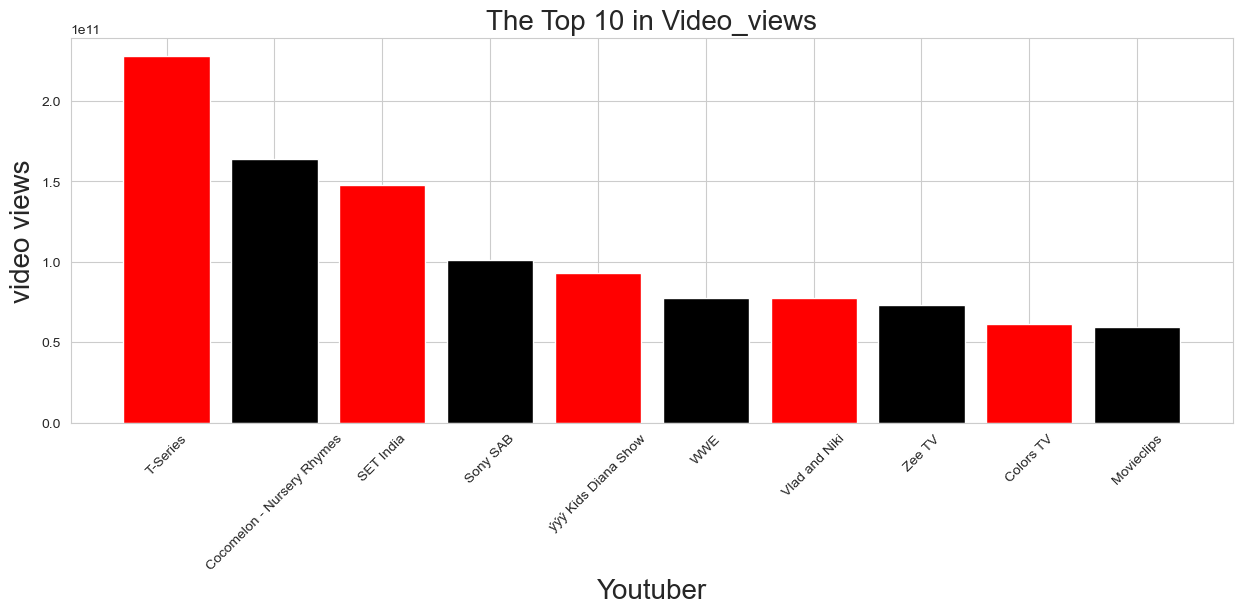

In [14]:
# call the create_barChart function create a bar chart for the top 10 in video views 
create_barChart(x2['Youtuber'], x2['video views'], 'The Top 10 in Video_views', ['red', 'black'])

#### The first place is T-Series, the second place is Cocomelon - Nursery Rhymes, and the third place is SET India on the top 10 list of video views. 

#### They are on the top 10 list of subscribers as well, so the higher subscribers gain more video views 

### The top 10 in channel_type_rank

In [15]:
# do the same thing for channel_type_rank as described above with the sort_specific_col function 
top10_channeltype_rank = sort_specific_col(interested_Data, 'channel_type_rank', True)
top10_channeltype_rank

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,highest_yearly_earnings,created_year,created_month,created_date,Population
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,108400000.0,2006.0,Mar,13.0,1.366418e+09
1,276,That Little Puff,23700000,2.028969e+10,Pets & Animals,769,United States,Animals,118.0,1.0,36200000.0,2020.0,Aug,29.0,3.282395e+08
2,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,1.0,64700000.0,2012.0,Feb,20.0,3.282395e+08
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,1.0,94800000.0,2006.0,Sep,1.0,3.282395e+08
4,787,Supercar Blondie,14100000,5.405563e+09,Autos & Vehicles,855,United Arab Emirates,Autos,1202.0,1.0,17000000.0,2007.0,Sep,12.0,9.770529e+06
5,85,TEDx Talks,38600000,7.339333e+09,Nonprofits & Activism,200933,United States,Nonprofit,768.0,1.0,2200000.0,2009.0,Jun,23.0,3.282395e+08
6,144,MR. INDIAN HACKER,31700000,5.711208e+09,Science & Technology,929,India,Tech,1132.0,1.0,5200000.0,2012.0,Jun,21.0,1.366418e+09
7,34,Aaj Tak,57600000,2.530775e+10,News & Politics,283775,India,News,71.0,1.0,22100000.0,2009.0,Aug,27.0,1.366418e+09
8,12,WWE,96000000,7.742847e+10,Sports,70127,United States,Sports,7.0,1.0,34300000.0,2007.0,May,11.0,3.282395e+08
9,72,Kimberly Loaiza,41300000,5.603112e+09,People & Blogs,291,Mexico,People,1157.0,1.0,6600000.0,2016.0,Nov,16.0,1.260140e+08


In [16]:
# return a new data frame with values in 'Youtuber', 'channel_type', 'channel_type_rank' columns
x3 = simpflied_df(top10_channeltype_rank, ['Youtuber', 'channel_type', 'channel_type_rank'])
x3

,Youtuber,channel_type,channel_type_rank
0,T-Series,Music,1.0
1,That Little Puff,Animals,1.0
2,MrBeast,Entertainment,1.0
3,Cocomelon - Nursery Rhymes,Education,1.0
4,Supercar Blondie,Autos,1.0
5,TEDx Talks,Nonprofit,1.0
6,MR. INDIAN HACKER,Tech,1.0
7,Aaj Tak,News,1.0
8,WWE,Sports,1.0
9,Kimberly Loaiza,People,1.0


### The top 10 highest_yearly_earnings

In [17]:
# do the same thing for highest_yearly_earnings as described above with the sort_sepcific_col
top10_highestEarnings = sort_specific_col(interested_Data,'highest_yearly_earnings', False)
top10_highestEarnings

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,highest_yearly_earnings,created_year,created_month,created_date,Population
0,418,DaFuq!?Boom!,19600000,7.906182e+09,Film & Animation,214,United States,Entertainment,656.0,106.0,110600000.0,2016.0,Jun,6.0,3.282395e+08
1,1,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,108400000.0,2006.0,Mar,13.0,1.366418e+09
2,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,1.0,94800000.0,2006.0,Sep,1.0,3.282395e+08
3,5,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,2.0,87500000.0,2006.0,Sep,20.0,1.366418e+09
4,22,Zee TV,70500000,7.313905e+10,Entertainment,129204,India,Entertainment,9.0,8.0,81900000.0,2005.0,Dec,11.0,1.366418e+09
5,140,StarPlus,32000000,2.680067e+10,Entertainment,44892,India,Entertainment,60.0,40.0,80000000.0,2006.0,May,19.0,1.366418e+09
6,16,Sony SAB,83000000,1.010000e+11,Shows,71270,India,Entertainment,4.0,7.0,79600000.0,2007.0,Aug,4.0,1.366418e+09
7,84,GR6 EXPLODE,38900000,2.515423e+10,Music,3043,Brazil,Music,73.0,30.0,78500000.0,2014.0,Aug,5.0,2.125594e+08
8,799,ViralHog,14000000,1.891769e+10,People & Blogs,41117,United States,Animals,136.0,3.0,65500000.0,2014.0,Aug,22.0,3.282395e+08
9,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,1.0,64700000.0,2012.0,Feb,20.0,3.282395e+08


In [18]:
# return a new data frame with the values in 'Youtuber', 'category', 'highest_yearly_earnings' columns
x4 = simpflied_df(top10_highestEarnings, ['Youtuber', 'category', 'highest_yearly_earnings'])
x4

,Youtuber,category,highest_yearly_earnings
0,DaFuq!?Boom!,Film & Animation,110600000.0
1,T-Series,Music,108400000.0
2,Cocomelon - Nursery Rhymes,Education,94800000.0
3,SET India,Shows,87500000.0
4,Zee TV,Entertainment,81900000.0
5,StarPlus,Entertainment,80000000.0
6,Sony SAB,Shows,79600000.0
7,GR6 EXPLODE,Music,78500000.0
8,ViralHog,People & Blogs,65500000.0
9,MrBeast,Entertainment,64700000.0


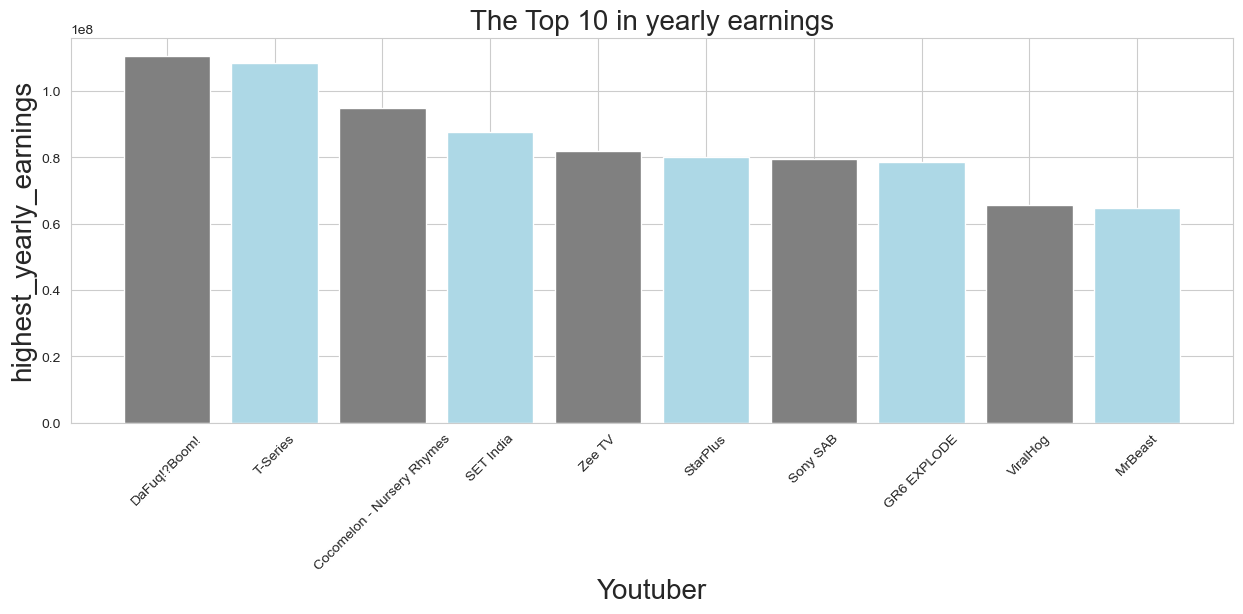

In [19]:
# create a bar chart for highest_yearlt_earnings
create_barChart(x4['Youtuber'], x4['highest_yearly_earnings'], 
                'The Top 10 in yearly earnings', ['gray', 'lightblue'])

#### Here is a interesting point because the first place is not T-series. Instead, it is DaFuq!?Boom!. The reason is that video views does not only include their subscribers but also non subscribers. 

#### Furthermore, it does not matter have you watched their videos before because once a person watches their one of the videos over 30 sec, the youtube count it as a video view.

### The top 10 in uploads

In [20]:
# do the same thing with sort_specific_col fpr uploads
top10_uploads = sort_specific_col(interested_Data, 'uploads', False)
top10_uploads

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,highest_yearly_earnings,created_year,created_month,created_date,Population
0,96,ABP NEWS,37000000,1.310261e+10,People & Blogs,301308,India,News,280.0,2.0,12800000.0,2012.0,Jun,1.0,1.366418e+09
1,858,GMA Integrated News,13400000,9.569815e+09,News & Politics,296272,Philippines,News,486.0,22.0,5500000.0,2007.0,Oct,29.0,1.081166e+08
2,748,TV9 Bharatvarsh,14500000,1.030352e+10,People & Blogs,293516,India,News,414.0,18.0,20100000.0,2018.0,Nov,19.0,1.366418e+09
3,34,Aaj Tak,57600000,2.530775e+10,News & Politics,283775,India,News,71.0,1.0,22100000.0,2009.0,Aug,27.0,1.366418e+09
4,108,IndiaTV,35500000,1.610502e+10,News & Politics,273255,India,News,185.0,3.0,14000000.0,2006.0,Aug,26.0,1.366418e+09
5,690,KOMPASTV,15000000,1.182731e+10,News & Politics,269050,Indonesia,News,331.0,17.0,5400000.0,2013.0,Aug,23.0,2.702039e+08
6,587,Thairath Online,16200000,1.456384e+10,News & Politics,244899,Thailand,News,238.0,14.0,10800000.0,2010.0,Sep,27.0,6.962558e+07
7,503,News 24,17700000,8.396876e+09,News & Politics,211620,Ukraine,News,880.0,112.0,17800000.0,2006.0,Feb,5.0,4.438516e+07
8,674,ABS-CBN News,15100000,1.048937e+10,News & Politics,209520,Philippines,News,404.0,17.0,8700000.0,2009.0,Oct,22.0,1.081166e+08
9,85,TEDx Talks,38600000,7.339333e+09,Nonprofits & Activism,200933,United States,Nonprofit,768.0,1.0,2200000.0,2009.0,Jun,23.0,3.282395e+08


In [21]:
# create a new data frame with the values in 'Youtuber', 'category', 'uploads' columns
x5 = simpflied_df(top10_uploads, ['Youtuber', 'category', 'uploads'])
x5

,Youtuber,category,uploads
0,ABP NEWS,People & Blogs,301308
1,GMA Integrated News,News & Politics,296272
2,TV9 Bharatvarsh,People & Blogs,293516
3,Aaj Tak,News & Politics,283775
4,IndiaTV,News & Politics,273255
5,KOMPASTV,News & Politics,269050
6,Thairath Online,News & Politics,244899
7,News 24,News & Politics,211620
8,ABS-CBN News,News & Politics,209520
9,TEDx Talks,Nonprofits & Activism,200933


#### Just want to ptactice the code here

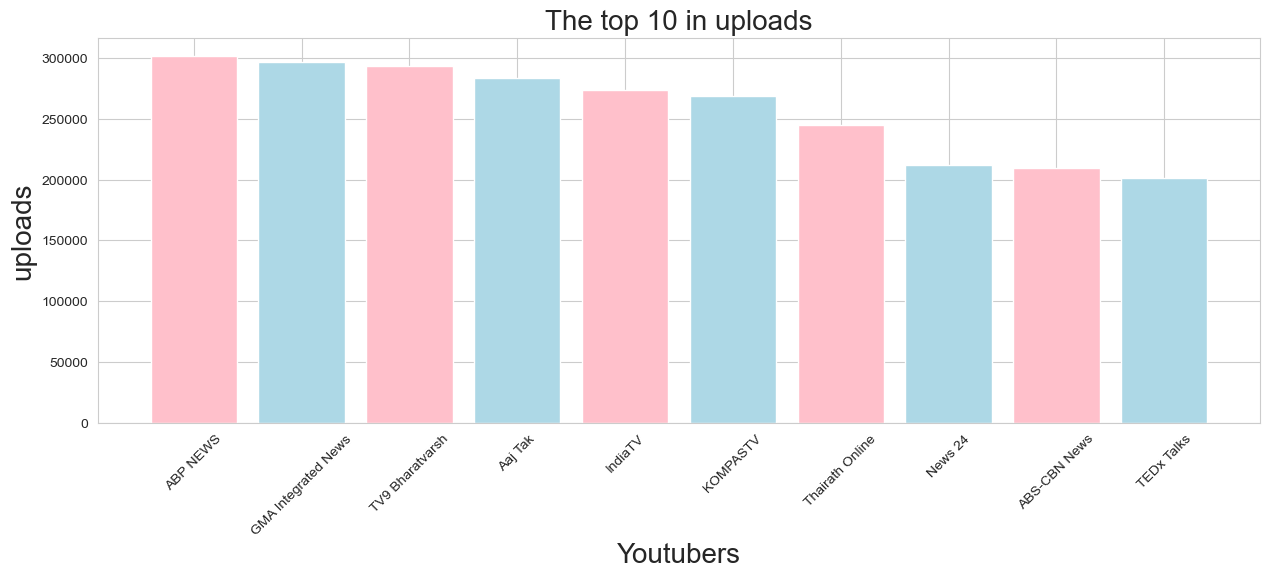

In [22]:
plt.figure(figsize=(15,5))
plt.bar(x5['Youtuber'], x5['uploads'], color=['pink', 'lightblue'])
plt.xlabel("Youtubers", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('uploads',fontsize=20)
plt.title('The top 10 in uploads', fontsize=20)
plt.show()

#### We have so many strangers to be familiar with because most of them are not listed on the other top list above. It implies that the number of uploads is not the case for a top youtuber. 

#### Another thing is found is that their channel types are News unless the last one.  News is reported everyday and no wonder they are on the top 10 list of uploads

### The most frequenct country are listed in the all top list without duplicate

In [23]:
# The fucntion mode_inCol is to count the frequencies of each distinct in a column without duplicates
    # if the same values meet twice, only add 1 to the frequency
    
# dictionary: pass a dictionary to count the frequencies, 
   # key is the colName and value is the frequency of the uniqe value
    
# df: is the data frame of the colName
# colName: is the specific column name that you want to calculate its freuqncies of the value in it
def mode_inCol(dictionary, df, colName):
    # use the for loop to iterate the column in the dataframe
    for i in range(len(df[colName])):
        # create a key variable to get the value in the column at that iteration as a key
        key = df[colName].values[i]
        
        # if the key in the dictionary, plus 1, else just assgin 1 to that key
        if key in dictionary.keys():
            dictionary[key] = dictionary[key] + 1
        else:
            dictionary[key] = 1

In [24]:
# garther all top list together into an array 
all_topList =[top10_subscribers, top10_videoviews_rank, top10_highestEarnings, top10_channeltype_rank, top10_uploads]

# This function is use to repeat the mode_inCol
# pass the all_topList
# colName: the specific column name that you want to calculate its freuqncies of the value in it
def call_mode(all_topList, colName):
    # create a dictionary
    dictonary = {}
    
    # use the for loop to iterate the data frames, and pass each data frame to the mode_inCol
    # i: is the dataframe at each iteration
    for i in all_topList:
        mode_inCol(dictonary, i, colName)
    return dictonary

In [25]:
# call the call_mode function to get the frequencies of each country on each top list
country_dict = call_mode(all_topList, 'Country')
country_dict

{'India': 20,
 'United States': 20,
 'Japan': 1,
 'Russia': 1,
 'Brazil': 1,
 'United Arab Emirates': 1,
 'Mexico': 1,
 'Philippines': 2,
 'Indonesia': 1,
 'Thailand': 1,
 'Ukraine': 1}

In [26]:
# create a dictionary called data, and assgin keys in country_dict as keys, 
    # and assgin the values in country_dict as values
data1 = {'Country': country_dict.keys(), 'frequency': country_dict.values()}

# create a data frame to display the values
df_mode_country = pd.DataFrame(data1)

#sort the data frame based on the frequencies of each country
df_mode_country = df_mode_country.sort_values('frequency', ascending=False).reset_index(drop=True)
df_mode_country

,Country,frequency
0,India,20
1,United States,20
2,Philippines,2
3,Japan,1
4,Russia,1
5,Brazil,1
6,United Arab Emirates,1
7,Mexico,1
8,Indonesia,1
9,Thailand,1


#### The number of youtube channels in the United States and the India is a tie. The common point English is widely spoken in both countries.

#### Also, English is a international language sopken in a lot of countries, so their audience is not only limited to their countries. Like Indians can watch an American Youtube channel.

### The most frequenct channel type are listed in the all top list without duplicate 

In [27]:
# calculate the frequencies of each channel type on the top list without duplicate
channel_dict = call_mode(all_topList, 'channel_type')
channel_dict

{'Music': 6,
 'Games': 1,
 'Entertainment': 18,
 'Education': 4,
 'People': 2,
 'Sports': 2,
 'Film': 1,
 'Animals': 2,
 'Autos': 1,
 'Nonprofit': 2,
 'Tech': 1,
 'News': 10}

In [28]:
# create a data frame to display the channel_type and their frequency on all the top lists
data2 = {'channel_type': channel_dict.keys(), 'frequency': channel_dict.values()}
df_mode_channels = pd.DataFrame(data2)
df_mode_channels = df_mode_channels.sort_values('frequency', ascending=False).reset_index(drop=True)
df_mode_channels

,channel_type,frequency
0,Entertainment,18
1,News,10
2,Music,6
3,Education,4
4,People,2
5,Sports,2
6,Animals,2
7,Nonprofit,2
8,Games,1
9,Film,1


#### There are more ''enterainment'' channels more than other type of channels.

### The duration in development of the top Youtube channels 

In [29]:
# merge all the top lists together without duplicates
merged_youtubers_topLists = pd.concat(all_topList).drop_duplicates().reset_index(drop=True)
merged_youtubers_topLists

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,highest_yearly_earnings,created_year,created_month,created_date,Population
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,1.084000e+08,2006.0,Mar,13.0,1.366418e+09
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,4055159.0,7423.0,5.800000e-01,2006.0,Mar,5.0,3.282395e+08
2,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,1.0,6.470000e+07,2012.0,Feb,20.0,3.282395e+08
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,1.0,9.480000e+07,2006.0,Sep,1.0,3.282395e+08
4,5,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,2.0,8.750000e+07,2006.0,Sep,20.0,1.366418e+09
5,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,1111,United States,Entertainment,5.0,3.0,3.510000e+07,2015.0,May,12.0,3.282395e+08
6,8,PewDiePie,111000000,2.905804e+10,Gaming,4716,Japan,Entertainment,44.0,4.0,1.900000e+06,2010.0,Apr,29.0,1.262266e+08
7,9,Like Nastya,106000000,9.047906e+10,People & Blogs,493,Russia,People,630.0,25.0,2.300000e+06,2016.0,Jan,14.0,1.443735e+08
8,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,574,United States,Entertainment,8.0,6.0,2.790000e+07,2018.0,Apr,23.0,3.282395e+08
9,11,Zee Music Company,96700000,5.785629e+10,Music,8548,India,Music,12.0,2.0,3.860000e+07,2014.0,Mar,12.0,1.366418e+09


In [30]:
# calculate the duration in development of each youtube channels 
df_duration_dev = merged_youtubers_topLists.copy()

# an array to store the duration in development of each youtuber
duration=[]

# create a for loop to calculate the duration
for i in range(len(df_duration_dev['created_year'])):
    
    # using 2023 is better than using datetime library because this data is only for 2023
    x = 2023 - df_duration_dev['created_year'].values[i]
    duration.append(x)

# create a data frame to display the duration
df_duration_dev['duration'] = duration
df_duration_dev = df_duration_dev.sort_values('duration', ascending=False).reset_index(drop=True)
df_duration_dev

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,highest_yearly_earnings,created_year,created_month,created_date,Population,duration
0,22,Zee TV,70500000,7.313905e+10,Entertainment,129204,India,Entertainment,9.0,8.0,8.190000e+07,2005.0,Dec,11.0,1.366418e+09,18.0
1,1,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,1.084000e+08,2006.0,Mar,13.0,1.366418e+09,17.0
2,503,News 24,17700000,8.396876e+09,News & Politics,211620,Ukraine,News,880.0,112.0,1.780000e+07,2006.0,Feb,5.0,4.438516e+07,17.0
3,108,IndiaTV,35500000,1.610502e+10,News & Politics,273255,India,News,185.0,3.0,1.400000e+07,2006.0,Aug,26.0,1.366418e+09,17.0
4,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,4055159.0,7423.0,5.800000e-01,2006.0,Mar,5.0,3.282395e+08,17.0
5,30,Movieclips,59500000,5.931647e+10,Film & Animation,39113,United States,Film,11.0,3.0,5.500000e+06,2006.0,Apr,28.0,3.282395e+08,17.0
6,140,StarPlus,32000000,2.680067e+10,Entertainment,44892,India,Entertainment,60.0,40.0,8.000000e+07,2006.0,May,19.0,1.366418e+09,17.0
7,5,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,2.0,8.750000e+07,2006.0,Sep,20.0,1.366418e+09,17.0
8,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,1.0,9.480000e+07,2006.0,Sep,1.0,3.282395e+08,17.0
9,787,Supercar Blondie,14100000,5.405563e+09,Autos & Vehicles,855,United Arab Emirates,Autos,1202.0,1.0,1.700000e+07,2007.0,Sep,12.0,9.770529e+06,16.0


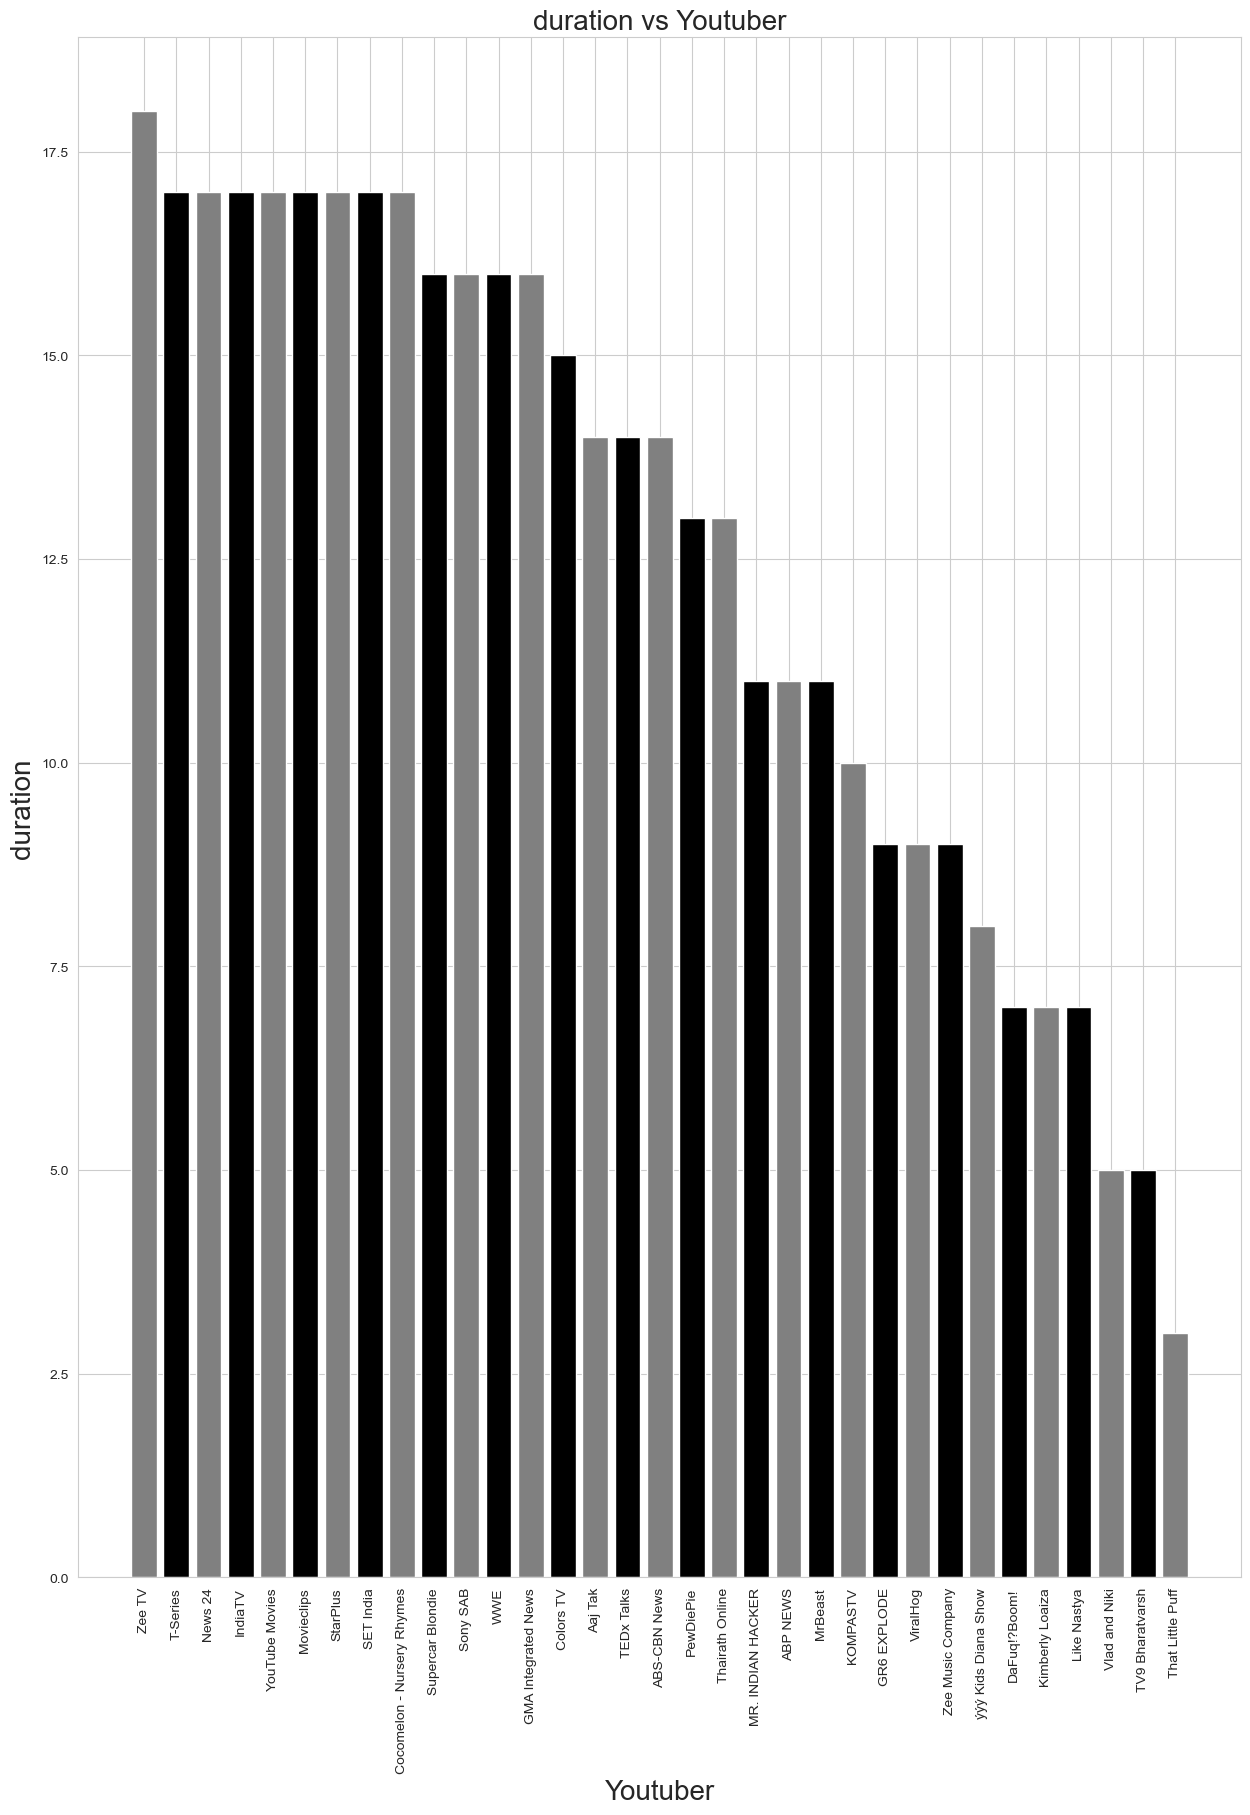

In [31]:
# create a bar chart for the duration
fig = plt.figure(figsize=(15,20))
plt.bar(df_duration_dev['Youtuber'], df_duration_dev['duration'], color=['gray', 'black'])
plt.xticks(rotation=90)
plt.xlabel("Youtuber", fontsize=20)
plt.ylabel('duration', fontsize=20)
plt.title('duration vs Youtuber', fontsize=20)
plt.show()

### The average duration in development of the top youtube channels

In [32]:
# import the mean builted-in method to calculate the mean of the duration in development among all youtubers on the top lits
from statistics import mean
mean_year = round(mean(duration))
print('The average duration in development is ' + str(mean_year) + ' years')

The average duration in development is 13 years


#### The duration in development is a minor success factor of a top youtube channel because it marginaly help channel gain subscribers or video views if your channel is not good enough. 

#### For example, MrBeast and ýýý Kids Diana Show are listed more than one time on the top lists but their duration in development of their channels is shorter than the others that only are listed once on the top lists

### How many time is each top youtuber listed on the top lists?

In [33]:
# create a data frame to calculate number of awards of each youtuber creators
number_of_awards = pd.DataFrame(data=df_duration_dev['Youtuber'], columns=['Youtuber'])
number_of_awards['category'] = df_duration_dev['category']
number_of_awards

,Youtuber,category
0,Zee TV,Entertainment
1,T-Series,Music
2,News 24,News & Politics
3,IndiaTV,News & Politics
4,YouTube Movies,Film & Animation
5,Movieclips,Film & Animation
6,StarPlus,Entertainment
7,SET India,Shows
8,Cocomelon - Nursery Rhymes,Education
9,Supercar Blondie,Autos & Vehicles


In [34]:
# create an array includes all the name of the top lists because I need to insert these name into the number_of_awards 
topListName=['top10_subscribers', 'top10_videoviews_rank', 'top10_highestEarnings', 'top10_channeltype_rank', 'top10_uploads']

# This function is to calculate the number of awards
# df_awards: is the data frame that store information about the number of awards 
    # and which top list does that creator get involved
# all_toplists: is an array which cotains all the top list dataframes that I created previously
# topListName: is described above

def countAwards(df_awards, all_topLists, topListName):
        # create an array to record which top lists are the creators listed?
        exist=[]
        
        # declare index to iterate the topListName
        index=0
        
        # create a for loop to iterate the top lists in the all_topLists
        for i in all_topLists:
            
            # create another for loop to iterate values in the youtube column of the df_awards
            for j in df_awards['Youtuber'].values:
                
                # if the youtuber in df_awards is in that top list, append 1 otherwise append 0
                if j in i['Youtuber'].values:
                    exist.append(1)
                else:
                    exist.append(0)
            # assign the values to df_awards and create a column for the values by the names in topListName[index]
            df_awards[topListName[index]] = exist
            index += 1
            exist.clear()

In [35]:
# call the function countAwards
countAwards(number_of_awards, all_topList, topListName)

#create a new columns and sum the row/number of awards from col1 to col6 
number_of_awards['number_of_awards'] = number_of_awards.iloc[:, 1:7].sum(axis=1)

# sort the dataframe based on number of awards
number_of_awards = number_of_awards.sort_values('number_of_awards', ascending=False).reset_index(drop=True)
number_of_awards

,Youtuber,category,top10_subscribers,top10_videoviews_rank,top10_highestEarnings,top10_channeltype_rank,top10_uploads,number_of_awards
0,Cocomelon - Nursery Rhymes,Education,1,1,1,1,0,4
1,T-Series,Music,1,1,1,1,0,4
2,MrBeast,Entertainment,1,0,1,1,0,3
3,SET India,Shows,1,1,1,0,0,3
4,TEDx Talks,Nonprofits & Activism,0,0,0,1,1,2
5,Aaj Tak,News & Politics,0,0,0,1,1,2
6,WWE,Sports,0,1,0,1,0,2
7,ýýý Kids Diana Show,People & Blogs,1,1,0,0,0,2
8,Zee TV,Entertainment,0,1,1,0,0,2
9,Vlad and Niki,Entertainment,1,1,0,0,0,2


#### This set of data frame is used to show the number of being listed on the top lists.


In [36]:
# create a dataframe to only display those outstanding creators who are listed more than once among all the top lists 
multipleAwards = number_of_awards.iloc[:11, :]
multipleAwards

,Youtuber,category,top10_subscribers,top10_videoviews_rank,top10_highestEarnings,top10_channeltype_rank,top10_uploads,number_of_awards
0,Cocomelon - Nursery Rhymes,Education,1,1,1,1,0,4
1,T-Series,Music,1,1,1,1,0,4
2,MrBeast,Entertainment,1,0,1,1,0,3
3,SET India,Shows,1,1,1,0,0,3
4,TEDx Talks,Nonprofits & Activism,0,0,0,1,1,2
5,Aaj Tak,News & Politics,0,0,0,1,1,2
6,WWE,Sports,0,1,0,1,0,2
7,ýýý Kids Diana Show,People & Blogs,1,1,0,0,0,2
8,Zee TV,Entertainment,0,1,1,0,0,2
9,Vlad and Niki,Entertainment,1,1,0,0,0,2


#### The most frequent category on the list is Entertainment, and none of the news channel are not listed here

### Check out the conditional probablility based on multipleAwards dataframe above

In [37]:
def count_condpro(df):
    columns = list(df.columns.values)
    columns.pop(0)
    columns.pop(0)
    columns.remove('number_of_awards')
    
    for i in columns:
        print('Given ' + i)
        x = columns.copy()
        x.remove(i)
        for j in x:
            table = pd.crosstab(index=df[i], columns=df[j], margins=True)
            p = round(table.iloc[1,1]/table.iloc[1,2], 2)*100
            print('The likelihood of being listed on ' + j + " is " + str(p) + " percent.")
        print('\n')

In [38]:
count_condpro(multipleAwards)

Given top10_subscribers
The likelihood of being listed on top10_videoviews_rank is 83.0 percent.
The likelihood of being listed on top10_highestEarnings is 67.0 percent.
The likelihood of being listed on top10_channeltype_rank is 50.0 percent.
The likelihood of being listed on top10_uploads is 0.0 percent.


Given top10_videoviews_rank
The likelihood of being listed on top10_subscribers is 62.0 percent.
The likelihood of being listed on top10_highestEarnings is 62.0 percent.
The likelihood of being listed on top10_channeltype_rank is 38.0 percent.
The likelihood of being listed on top10_uploads is 0.0 percent.


Given top10_highestEarnings
The likelihood of being listed on top10_subscribers is 67.0 percent.
The likelihood of being listed on top10_videoviews_rank is 83.0 percent.
The likelihood of being listed on top10_channeltype_rank is 50.0 percent.
The likelihood of being listed on top10_uploads is 0.0 percent.


Given top10_channeltype_rank
The likelihood of being listed on top10_s

#### The probability of being listed on the top 10 video views  is 83% if already being listed on the top 10 subscribers. In another word, the greater the subscribers you have, the more video views you can get.

#### Reversely, thr probability of being listed on the top 10 subscribers is 62% if already being listed on the top 10 video views. This lower than given the top 10 subscribers because video views does not only includes the views from the subscribers.

#### Given vthe top 10 video views, the likehood of being listed on the top 10 highest yearly earnings is 62 percent. This is lower than given the subscribers which the subcribers are interested in their channels and would like to watch their videos multiple times. 

#### The probability of being listed on the top10 subscribers and highest yearly earnings are the same.

#### Given top 10 channel type rank, the probability of being on the top 10 subscribers, video views, and highest yearly earning is only 50%. As a result, the top 10 channel type rank does not soley based on a particular factor.

#### The number of uploads for a createors is not the case of gaining earnings, video views, and subscribers, but given a large amount of uploads, the likelihood of being listed on the top10 channel type rank is 100 percent. .

### Check out the correlation between each variable on the top lists.

In [39]:
df = df_duration_dev.copy()
df = df.drop(['channel_type_rank', 'video_views_rank', 'created_year', 'created_date', 
              'created_month', 'rank', 'Youtuber', 'category', 'channel_type', 'Country'], axis=1)

In [40]:
df.corr()

,subscribers,video views,uploads,highest_yearly_earnings,Population,duration
subscribers,1.000000,0.770205,-0.452230,0.382612,0.160541,0.244469
video views,0.770205,1.000000,-0.313487,0.581072,0.286221,0.257509
uploads,-0.452230,-0.313487,1.000000,-0.353747,0.214714,0.204208
highest_yearly_earnings,0.382612,0.581072,-0.353747,1.000000,0.334747,0.130754
Population,0.160541,0.286221,0.214714,0.334747,1.000000,0.207690
duration,0.244469,0.257509,0.204208,0.130754,0.207690,1.000000


#### There are totally 33 Youtubers on the top lists

### subscribers and video views
#### The subscribers can leads to a greater video views and have a 0.77 correlation with the video views. The reason why it is not 100% because the video views include other nonsubscribers. 

### subscribers vs video views and highest yearly earnings
#### The subscribers has a 0.38 correlation with the earnings. However, the video views has a a greater correlation which is 0.58 with the estimated earnings. As a result, the higher video views leads to more earnings.

### uploads, subscribers, and video views
#### The uploads is not a factor for a top youtuber because the correlations between are negative.

### population, subscribers, and video views
#### The population in a Youtuber's country is not a success factor for a top youtuber because the correlations bewteen them are pretty akward.

### duration, subscribers and video views
#### The duration has a 0.24 correlation with the subscribers and  a 0.25 correlation with video views, so it does not contribute a lot for being a top Youtuber.


### The subscribers is the main sources to leads to video views and more subscribers means that the Youtuber have a great impact on the social media and can gain more video views. Once the Youtuber has more video views, the Youtuber can earn more and have greater resources that help them develop the channel to reasonate with more audiences. As a results, the subscribers and the video views are the most important factors.

## Earnings Analysis: Explore the correlation between channel performance and estimated earnings.

In [41]:
# get a copy of the dataframe
earnings_explore = interested_Data.copy()

# remove unnecessary and categorical data
earnings_explore = earnings_explore.drop(['channel_type_rank', 'video_views_rank', 'created_year', 'created_date', 
              'created_month', 'rank', 'Youtuber', 'category', 'channel_type', 'Country'], axis=1)
earnings_explore

,subscribers,video views,uploads,highest_yearly_earnings,Population
0,245000000,2.280000e+11,20082,1.084000e+08,1.366418e+09
1,170000000,0.000000e+00,1,5.800000e-01,3.282395e+08
2,166000000,2.836884e+10,741,6.470000e+07,3.282395e+08
3,162000000,1.640000e+11,966,9.480000e+07,3.282395e+08
4,159000000,1.480000e+11,116536,8.750000e+07,1.366418e+09
...,...,...,...,...,...
989,12400000,6.993406e+09,99,2.400000e+06,3.282395e+08
990,12300000,9.029610e+09,1200,2.650000e+07,2.125594e+08
991,12300000,1.674410e+09,1500,3.100000e+06,1.366418e+09
993,12300000,3.741235e+08,39,1.858000e+05,1.028545e+07


### This data table includes all the Youtubers

### Checkout the correlation with all the Youtubers

In [42]:
# explore the correlation based all the Youtubers
earnings_explore.corr()

,subscribers,video views,uploads,highest_yearly_earnings,Population
subscribers,1.000000,0.794863,0.081646,0.499096,0.089786
video views,0.794863,1.000000,0.162825,0.640045,0.087200
uploads,0.081646,0.162825,1.000000,0.190239,0.145718
highest_yearly_earnings,0.499096,0.640045,0.190239,1.000000,0.144769
Population,0.089786,0.087200,0.145718,0.144769,1.000000


#### The correlation based on all Youtubers between the estimated earnings and channel performance is basiclly the same as what we metioned above using the top youtubers on the top lists.

## Content Strategy: Discover the most popular categories and upload frequencies that resonate with audiences.

### Popluar categories
#### We can either use the total number of subscribers or the video views to rank each category to see which category is on the first place. 

In [43]:
# create a dataframe called popular_categories and assgin categories to it using unique() of interested_Data
popular_categories = pd.DataFrame(data=interested_Data['category'].unique(), columns=['category'])
popular_categories

,category
0,Music
1,Film & Animation
2,Entertainment
3,Education
4,Shows
5,People & Blogs
6,Gaming
7,Sports
8,Howto & Style
9,News & Politics


In [44]:
# This function is to count the total views of each category in interested_Data
# df: is the dataframe used to count the views
def countViews(df):
    # create a dictionary 
    # keys are the categories, and values are the views
    views_dict={}
    
    # create a for loop to iterate the category in the dataframe
    for i in range(len(df['category'])):
        
        # declare a variable to store the name of the category
        categoryName = df['category'].values[i]
        
        # declare a variable to store the video views of that youtube channel in that category
        views =  df['video views'].values[i]
        
        # if the category is in the dictionary, add the values with views; otherwise, assgin views to it 
        if categoryName in views_dict.keys():
            views_dict[categoryName] = views_dict[categoryName] + views
        else:
            views_dict[categoryName] = views
    return views_dict

In [45]:
# call the function countViews and use the values() method to return the values from the dictionary
# values() have all the video views of each category
popular_categories['video views'] = countViews(interested_Data).values()

# sort the dataframe by video views and reset the index
popular_categories = popular_categories.sort_values('video views', ascending=False).reset_index(drop=True)
popular_categories

,category,video views
0,Music,2.802168e+12
1,Entertainment,2.243453e+12
2,People & Blogs,1.009739e+12
3,Education,6.801270e+11
4,Gaming,6.115200e+11
5,Comedy,5.074868e+11
6,Shows,4.379051e+11
7,Film & Animation,4.312333e+11
8,News & Politics,2.703919e+11
9,Howto & Style,1.499354e+11


#### Just pratice my code these codes are described previously

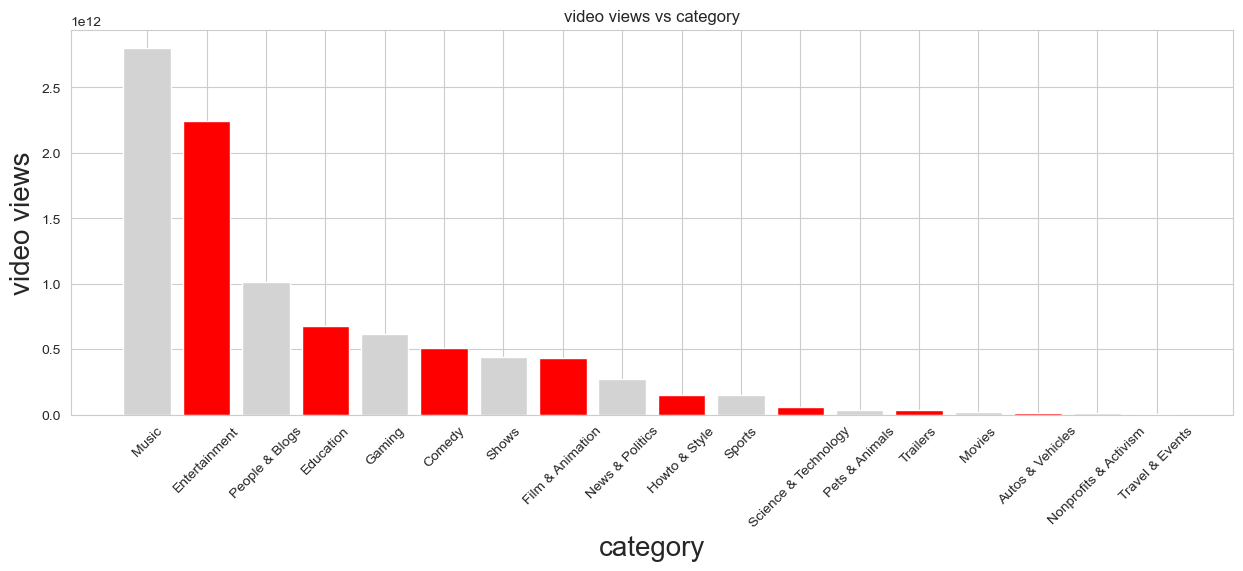

In [46]:
x = popular_categories['category']
y = popular_categories['video views']

plt.figure(figsize=(15,5))
plt.bar(x, y, color=['lightgray', 'red'])
plt.xticks(rotation=45)
plt.xlabel('category', fontsize=20)
plt.ylabel('video views', fontsize=20)
plt.title('video views vs category')
plt.show()

### Finding the frequency of each category in 900 over Youtubers

In [47]:
# import Counter to calculate the frequency of each category in the dataframe
from collections import Counter

# count the frequency based on the category column from the interested_Data df
category_counter = Counter(interested_Data['category'])

# the category_counter consists of the name of category and their freuqneices, so convert the counter into a dictionary 
category_dict = dict(category_counter)

In [48]:
# create a dataframe to display information of the frequency of each category
frequency_category = pd.DataFrame({'category': category_dict.keys(), 'frequency': category_dict.values()})

# sort the ferquency of each category and reset the index
frequency_category = frequency_category.sort_values('frequency', ascending=False).reset_index(drop=True)
frequency_category

,category,frequency
0,Entertainment,211
1,Music,180
2,People & Blogs,102
3,Gaming,80
4,Comedy,65
5,Education,42
6,Film & Animation,36
7,Howto & Style,32
8,News & Politics,26
9,Science & Technology,14


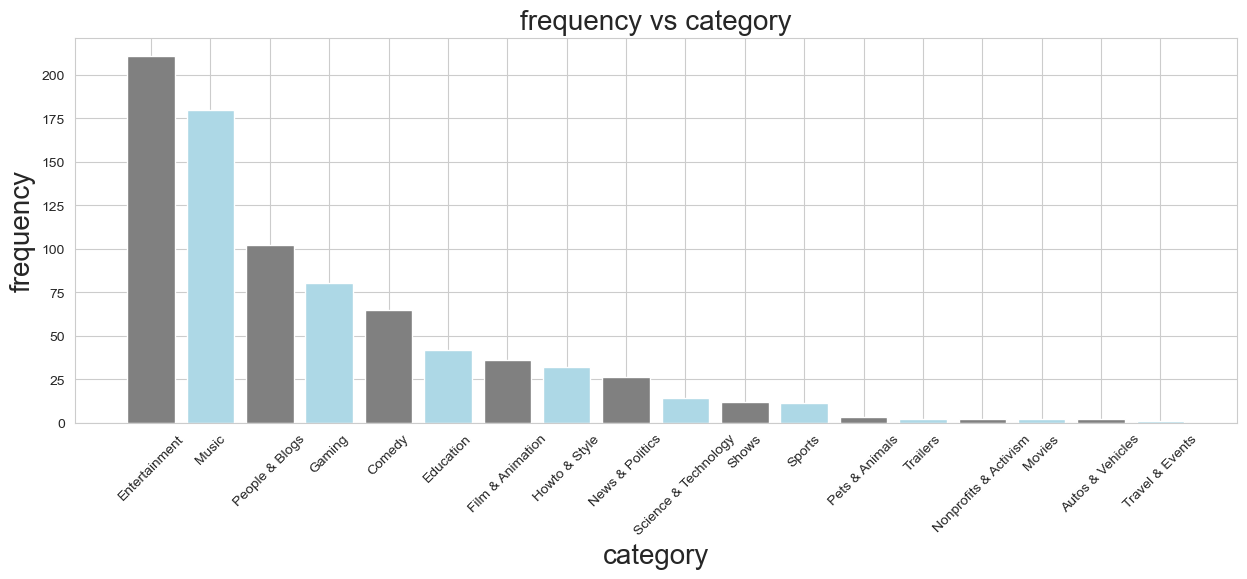

In [49]:
# create a bar chart
create_barChart(frequency_category['category'], frequency_category['frequency'], 
                'frequency vs category', ['gray', 'lightblue'])

#### Music is on the first place, so thete are more people listening to music than enjoying other type of show. 

#### Moreover, the number of entertainment is more than Music but Music still have a greater number video views.

#### In conclusion, audiences would like to listen to music more than entertainment, so it is popular, but there are more youtubers in the entertianment field.

### Uploads Frequency

In [50]:
# calculate the current days, convert years and months in to days
nowDays = 2023*365 + 8*30 + 24

# since the month is str type in the data frame, so I need the month to be integer type to calculate 
month_integer =[3, 2, 9, 5, 4, 1, 6, 8, 7, 12, 10, 11]
uploads_frequency = interested_Data.copy()

# create a dictionary and use zip(months_str, months_int) to match them, and assgin it to a dictionary
month_dict = dict(zip(uploads_frequency['created_month'].unique(), month_integer))
month_dict

{'Mar': 3,
 'Feb': 2,
 'Sep': 9,
 'May': 5,
 'Apr': 4,
 'Jan': 1,
 'Jun': 6,
 'Aug': 8,
 'Jul': 7,
 'Dec': 12,
 'Oct': 10,
 'Nov': 11}

### Here, get the upload frequencies of the youtube channels on the top 10 channel type rank list

### We can count the upload frequencies of all the top youtube channels in a different channel type and the channel type can indicate how they develop their channels and resonate audiences based on their channel categories.

In [51]:
# create an array to store upload frequency of each Youtuber on the top10 channel type rank list
frequency=[]

# create a for loop to iterate the youtuber on the top10 channel type rank list
for i in range(len(top10_channeltype_rank['Youtuber'])):
    # get the channel created year
    year_day = top10_channeltype_rank['created_year'].values[i]
    
    # get the channel created month
    month_str = top10_channeltype_rank['created_month'].values[i]
    
    # since month_str is a str type of month like Mar from the data
        # so I need to get the int type from the month_dict that I created above
    month_day =  month_dict[month_str]
    
    # get the channel created days
    days = top10_channeltype_rank['created_date'].values[i]
    
    # minus the created days by the current days
    daysOnYoutube = nowDays - ( year_day*365 + month_day*30 + days)
    
    # if the uploads is not 0, divide the daysOnYoutube by the number of upload, otherwise append 0
    uploads = top10_channeltype_rank['uploads'].values[i]
    if uploads != 0:
        frequency.append(round(daysOnYoutube/uploads))
    else:
        frequency.append(0)   

In [52]:
# create a dataframe to display the upload frequency
top10_channeltype_uf = pd.DataFrame({'Youtuber': top10_channeltype_rank['Youtuber'], 
                                     'category': top10_channeltype_rank['category'], 
                                     'channel_type': top10_channeltype_rank['channel_type']})
top10_channeltype_uf['upload frequencies'] = frequency

# sort the dataframe by upload ferquencies
top10_channeltype_uf = top10_channeltype_uf.sort_values('upload frequencies')
top10_channeltype_uf

,Youtuber,category,channel_type,upload frequencies
0,T-Series,Music,Music,0
5,TEDx Talks,Nonprofits & Activism,Nonprofit,0
7,Aaj Tak,News & Politics,News,0
8,WWE,Sports,Sports,0
1,That Little Puff,Pets & Animals,Animals,1
6,MR. INDIAN HACKER,Science & Technology,Tech,4
2,MrBeast,Entertainment,Entertainment,6
3,Cocomelon - Nursery Rhymes,Education,Education,6
4,Supercar Blondie,Autos & Vehicles,Autos,7
9,Kimberly Loaiza,People & Blogs,People,8


In [53]:
print("The mean of the upload frequencies is " + str(round(mean(frequency))))

The mean of the upload frequencies is 3


#### The upload frequencies 0 means that the channel upload videos everday and 1 means that the channel upload videos every other day。

#### Four of the youtuber upload videos everyday since they are in Music, Activism, News, and Sports. These topics are high in demand. People read news to learn politics, listen to music to relax, watch speech to motivate themselves, watch sports to enjoy excitement in a game.  

#### Moreover, their productivity is efficient, and many events in the world related to their categories everday, so they always have video footage everyday to film a lot of video compared with other categories.

#### Other categories like Pets, Science, and entertainment, these youtube channels need to collect information by themselves to flim a video or they need to make a plan of their video's content and invite people to participate in their videos, so all these complicated process it takes longer to them to film a video.  

## Trending Topics: Investigate how certain categories gain popularity over time

### Investigate video_views_for_the_last_30_days

In [54]:
# create an dictionary to calculate the total video views of each category
    # keys are the categories and values are the total video views
category_dict={}

# create a new dataframe and get a copy of interested_Data
allData = initialData.copy()
allData = allData.dropna(axis=0)

In [55]:
# create a for loop to iterate video_views_for_the_last_30_days in allData df
for i in range(len(allData['video_views_for_the_last_30_days'])):
    # get the catgegory name
    category = allData['category'].values[i]
    
    # get the video_views_for_the_last_30_days
    views_in30days = allData['video_views_for_the_last_30_days'].values[i]
    
    # if the category name in the dictionary, add views_in30days with the values in dictionary; 
        #otherwise assgin views_in30days to the vlaue
    if category in category_dict.keys():
        category_dict[category] = category_dict[category] + views_in30days
    else:
        category_dict[category] = views_in30days

In [56]:
category_growth = pd.DataFrame({'category': category_dict.keys(), 
                                'video_views_for_the_last_30_days': category_dict.values()})
category_growth = category_growth.sort_values('video_views_for_the_last_30_days', ascending=False).reset_index(drop=True)

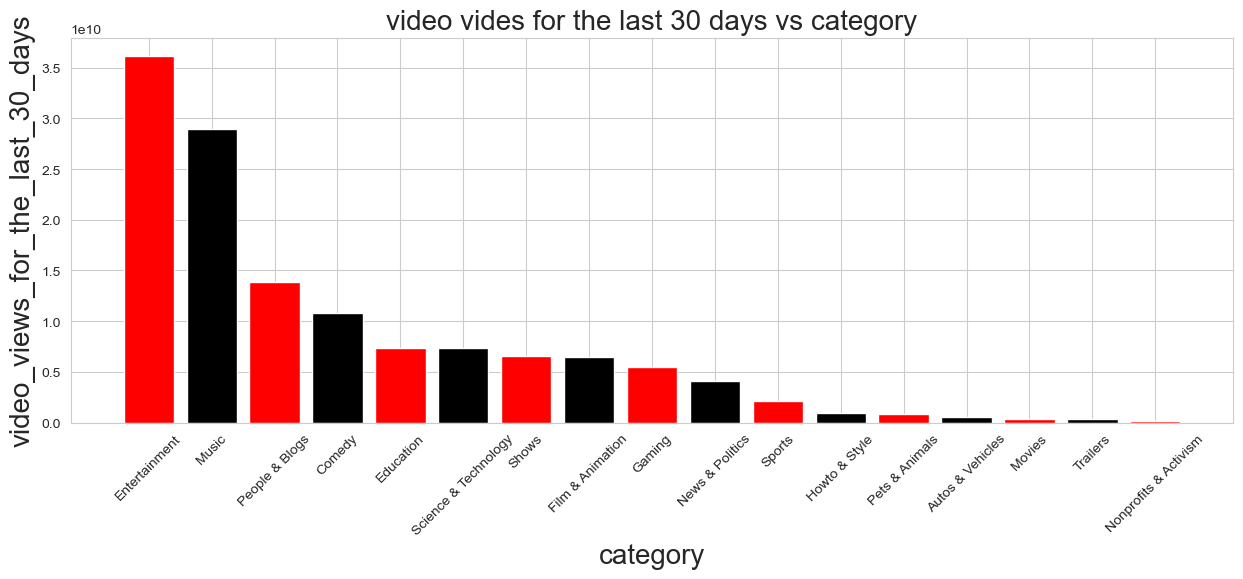

In [57]:
create_barChart(category_growth['category'], category_growth['video_views_for_the_last_30_days'], 
                'video vides for the last 30 days vs category', 
                ['red', 'black'])

#### The entertainment has the greatest video views for the last 30 days

### Investigate subscribers_for_last_30_days

In [58]:
# Just do the same thing for the subscribers_for_last_30_days 
# create a dictionary to calculate the total subscribers for last 30 days of each category
category_dict_sub={}

# create a for loop to iterate the subscribers_for_last_30_days in allData df
for i in range(len(allData['subscribers_for_last_30_days'])):
    # get the category name
    category = allData['category'].values[i]
    
    # get the subscribers_for_last_30_days
    subscribers_in30days = allData['subscribers_for_last_30_days'].values[i]
    
    # if the category in the dictionary, add subscribers_in30days; otherwise assgin it to the value
    if category in category_dict_sub.keys():
        category_dict_sub[category] = category_dict_sub[category] + subscribers_in30days
    else:
        category_dict_sub[category] = subscribers_in30days

In [59]:
# create a dataframe that is the total number of subscribers_for_last_30_daysof each category
data = {'category': category_dict_sub.keys(), 'subscribers_for_last_30_days': category_dict_sub.values()}
category_growth_sub = pd.DataFrame(data)
category_growth_sub = category_growth_sub.sort_values('subscribers_for_last_30_days', 
                                                      ascending=False).reset_index(drop=True)

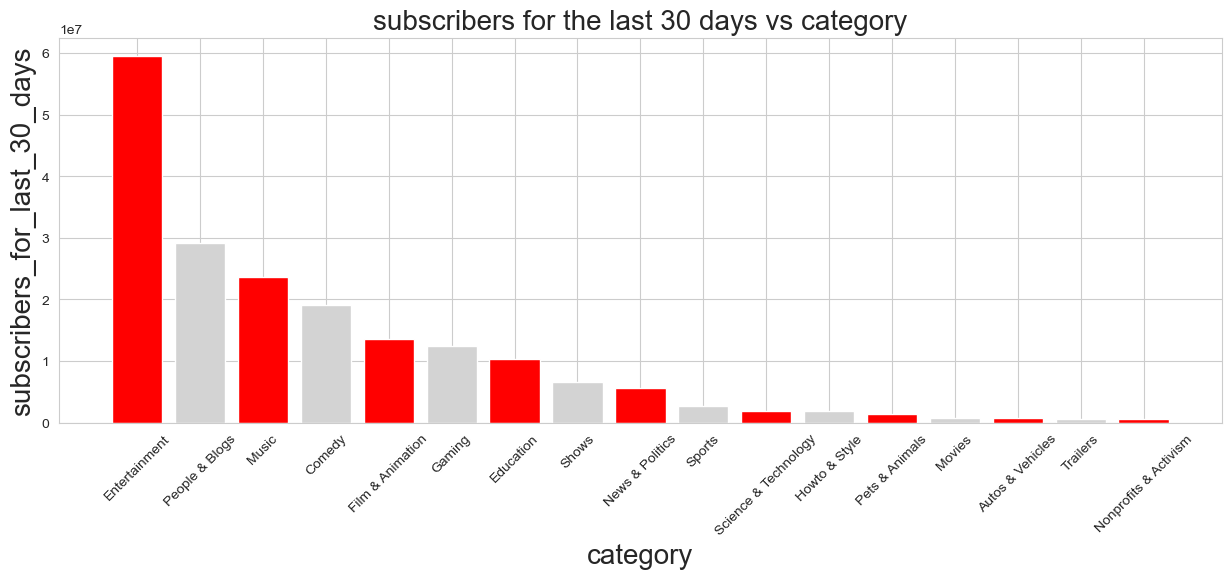

In [60]:
create_barChart(category_growth_sub['category'], category_growth_sub['subscribers_for_last_30_days'], 
                'subscribers for the last 30 days vs category', 
                ['red', 'lightgray'])

#### The enteraninment will be a popluar category over time and have a greater total video views over the music. 

#### The enterainment gain the most video views and the subscribers for the last days. If the trend keep proceeding, we could expect more youtube channels of entertainment on the top list of the subscribers or video views.

#### The people & Blogs category gain more subscribers in the last 30 days than Music. This category is in the thrid place of the total video views for the last 30 days and the difference between it and Music is unexceptionally large, but it will be a minor trend in the further.

## Youtubers Analysis

#### Use Cluster analysis to analyze how many levels of Youtubers are on Youtube

### Find the best number of cluster first

In [61]:
subscribers_videoViews = interested_Data[['subscribers', 'video views']].copy()
x = subscribers_videoViews.copy()

In [62]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [67]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[1645.9999999999995,
 836.1089316897419,
 508.58517008848895,
 335.7821008451376,
 263.30366198592935,
 208.7386648427721,
 175.94080964291953,
 146.76671431233808,
 126.88782224060725]

Text(0, 0.5, 'wcss')

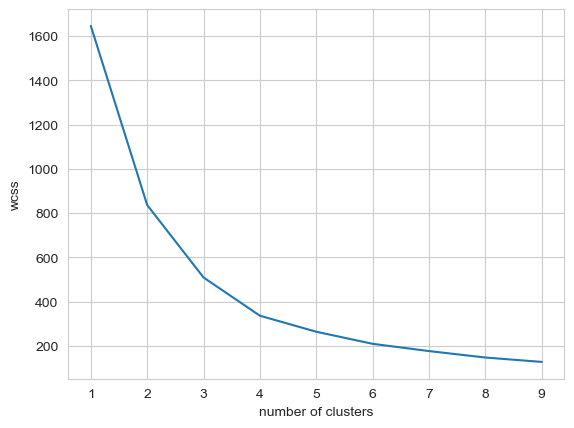

In [68]:
plt.plot(range(1,10), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

### Here, the best properly is among 2,3,4.
### Let's check them out

In [101]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)
cluster = x.copy()
cluster['pred_cluster'] = kmeans.fit_predict(x_scaled)

Text(0, 0.5, 'video_views')

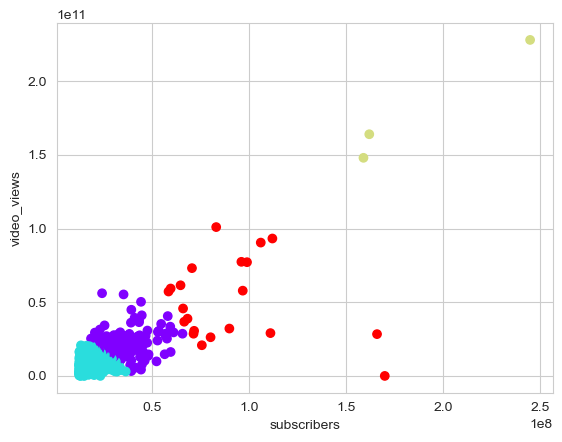

In [102]:
plt.scatter(cluster['subscribers'], cluster['video views'], c=cluster['pred_cluster'], cmap='rainbow')
plt.xlabel('subscribers')
plt.ylabel('video_views')

#### Green group: We only have three red dots means they are top in video views and subscribers, so they are popular. 

#### Green group: they are not top in both but they either have a great number of subscribers or video views, so they are popluar. Most of them are just low in subscribers compared with their video views, so they are still popluar and have a large potential growth in video views.

#### Purple group: they are the small youtubers, they some subscribers and video videws, but they still have some popularity for a small group of people.

#### Cyan group: they dont have many subscribers and video views or their channels has not been developed weel.

### Youtube should try to help those youtubers who are low in subscribers but high in video videos gain more subscribers in advacne. Youtube could work with them to make shows or to hold events to attract more audiences to be their subscribers

### Creating a small acitivity with some sort of rewards for those small youtube channels may be a great way to prompt their engagement in creating more great content and through the small activity let more audiences watch their videos.